In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import ace_tools_open as ace_tools
from collections import namedtuple
from sklearn.tree import DecisionTreeRegressor as SKDecisionTreeRegressor
import pandas as pd
import mlcroissant as mlc


# EDA

In [2]:
import pandas as pd

# Load the CSV file (make sure the path is correct)
data = pd.read_csv('Agrofood_co2_emission.csv')


# Inspect columns and data
print(data.columns)
data.head()


Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission',
       'Average Temperature °C'],
      dtype='object')


,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6965.0,2.005125e+03,8.894665e+00,1990.000000,1997.000000,2.005000e+03,2.013000e+03,2.020000e+03
Savanna fires,6934.0,1.188391e+03,5.246288e+03,0.000000,0.000000,1.651850e+00,1.110814e+02,1.146164e+05
Forest fires,6872.0,9.193022e+02,3.720079e+03,0.000000,0.000000,5.179000e-01,6.495077e+01,5.222763e+04
Crop Residues,5576.0,9.987063e+02,3.700345e+03,0.000200,11.006525,1.036982e+02,3.776410e+02,3.349007e+04
Rice Cultivation,6965.0,4.259667e+03,1.761383e+04,0.000000,181.260800,5.348174e+02,1.536640e+03,1.649153e+05
Drained organic soils (CO2),6965.0,3.503229e+03,1.586145e+04,0.000000,0.000000,0.000000e+00,6.904088e+02,2.410251e+05
Pesticides Manufacturing,6965.0,3.334184e+02,1.429159e+03,0.000000,6.000000,1.300000e+01,1.163255e+02,1.645900e+04
Food Transport,6965.0,1.939582e+03,5.616749e+03,0.000100,27.958600,2.049628e+02,1.207001e+03,6.794576e+04
Forestland,6472.0,-1.782829e+04,8.183221e+04,-797183.079000,-2848.350000,-6.292000e+01,0.000000e+00,1.711211e+05
Net Forest conversion,6472.0,1.760564e+04,1.011575e+05,0.000000,0.000000,4.444000e+01,4.701746e+03,1.605106e+06


In [5]:
data.isna().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


In [6]:
numeric_cols = data.select_dtypes(include='number').columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())


In [10]:
lea = LabelEncoder()
data.Area = lea.fit_transform(data.Area)

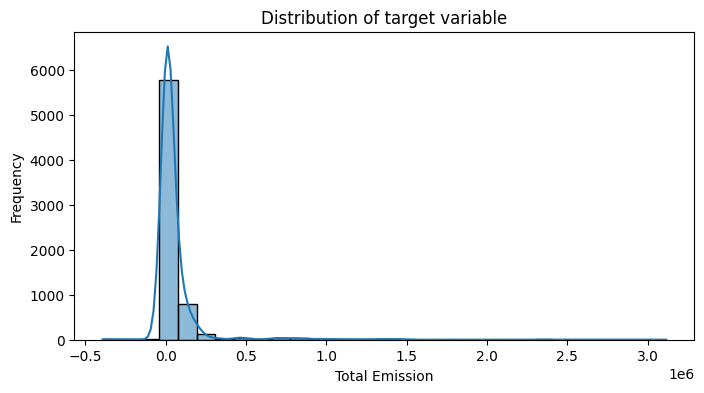

In [7]:
plt.figure(figsize=(8, 4))
sns.histplot(data["total_emission"], bins=30, kde=True)
plt.title('Distribution of target variable')
plt.xlabel('Total Emission')
plt.ylabel('Frequency')
plt.show()

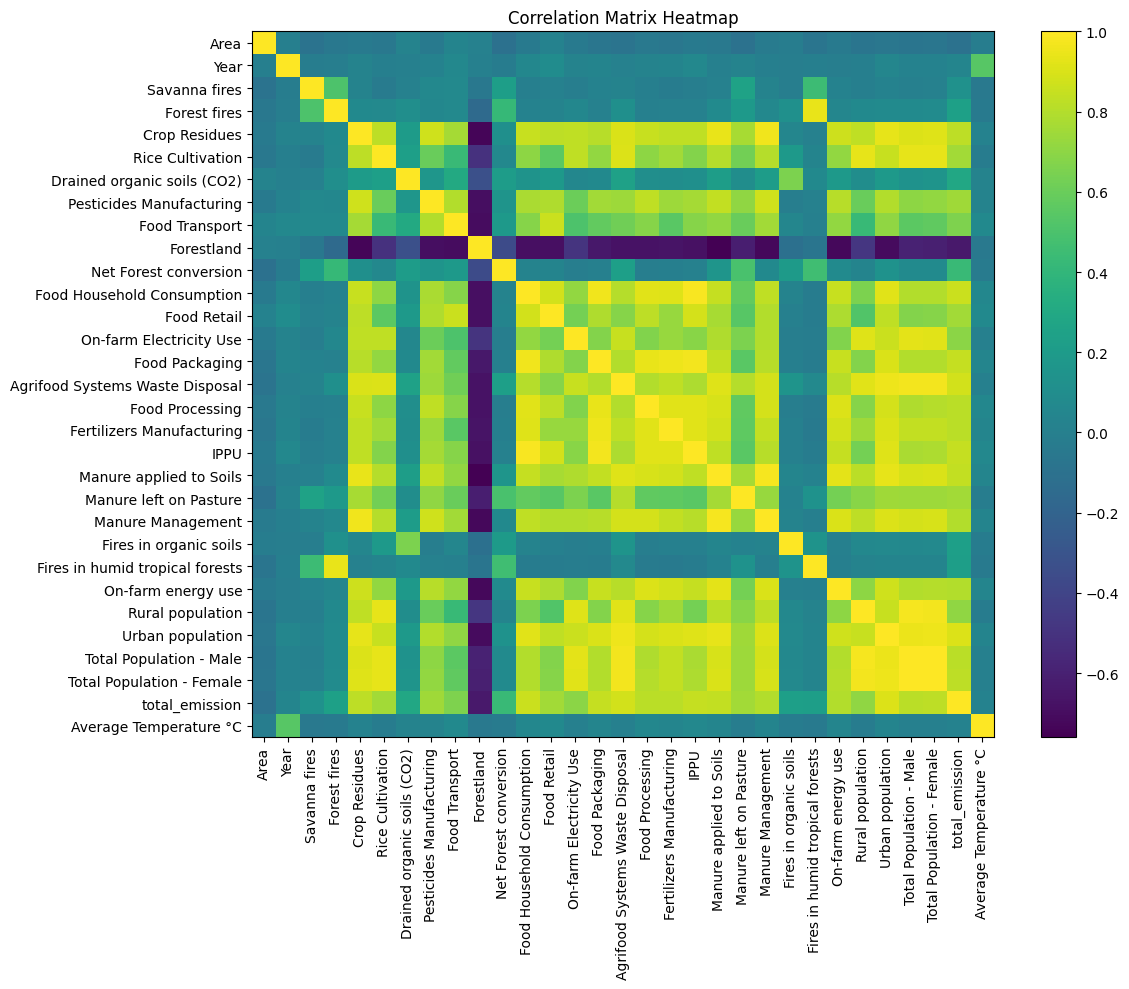

In [11]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix, aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

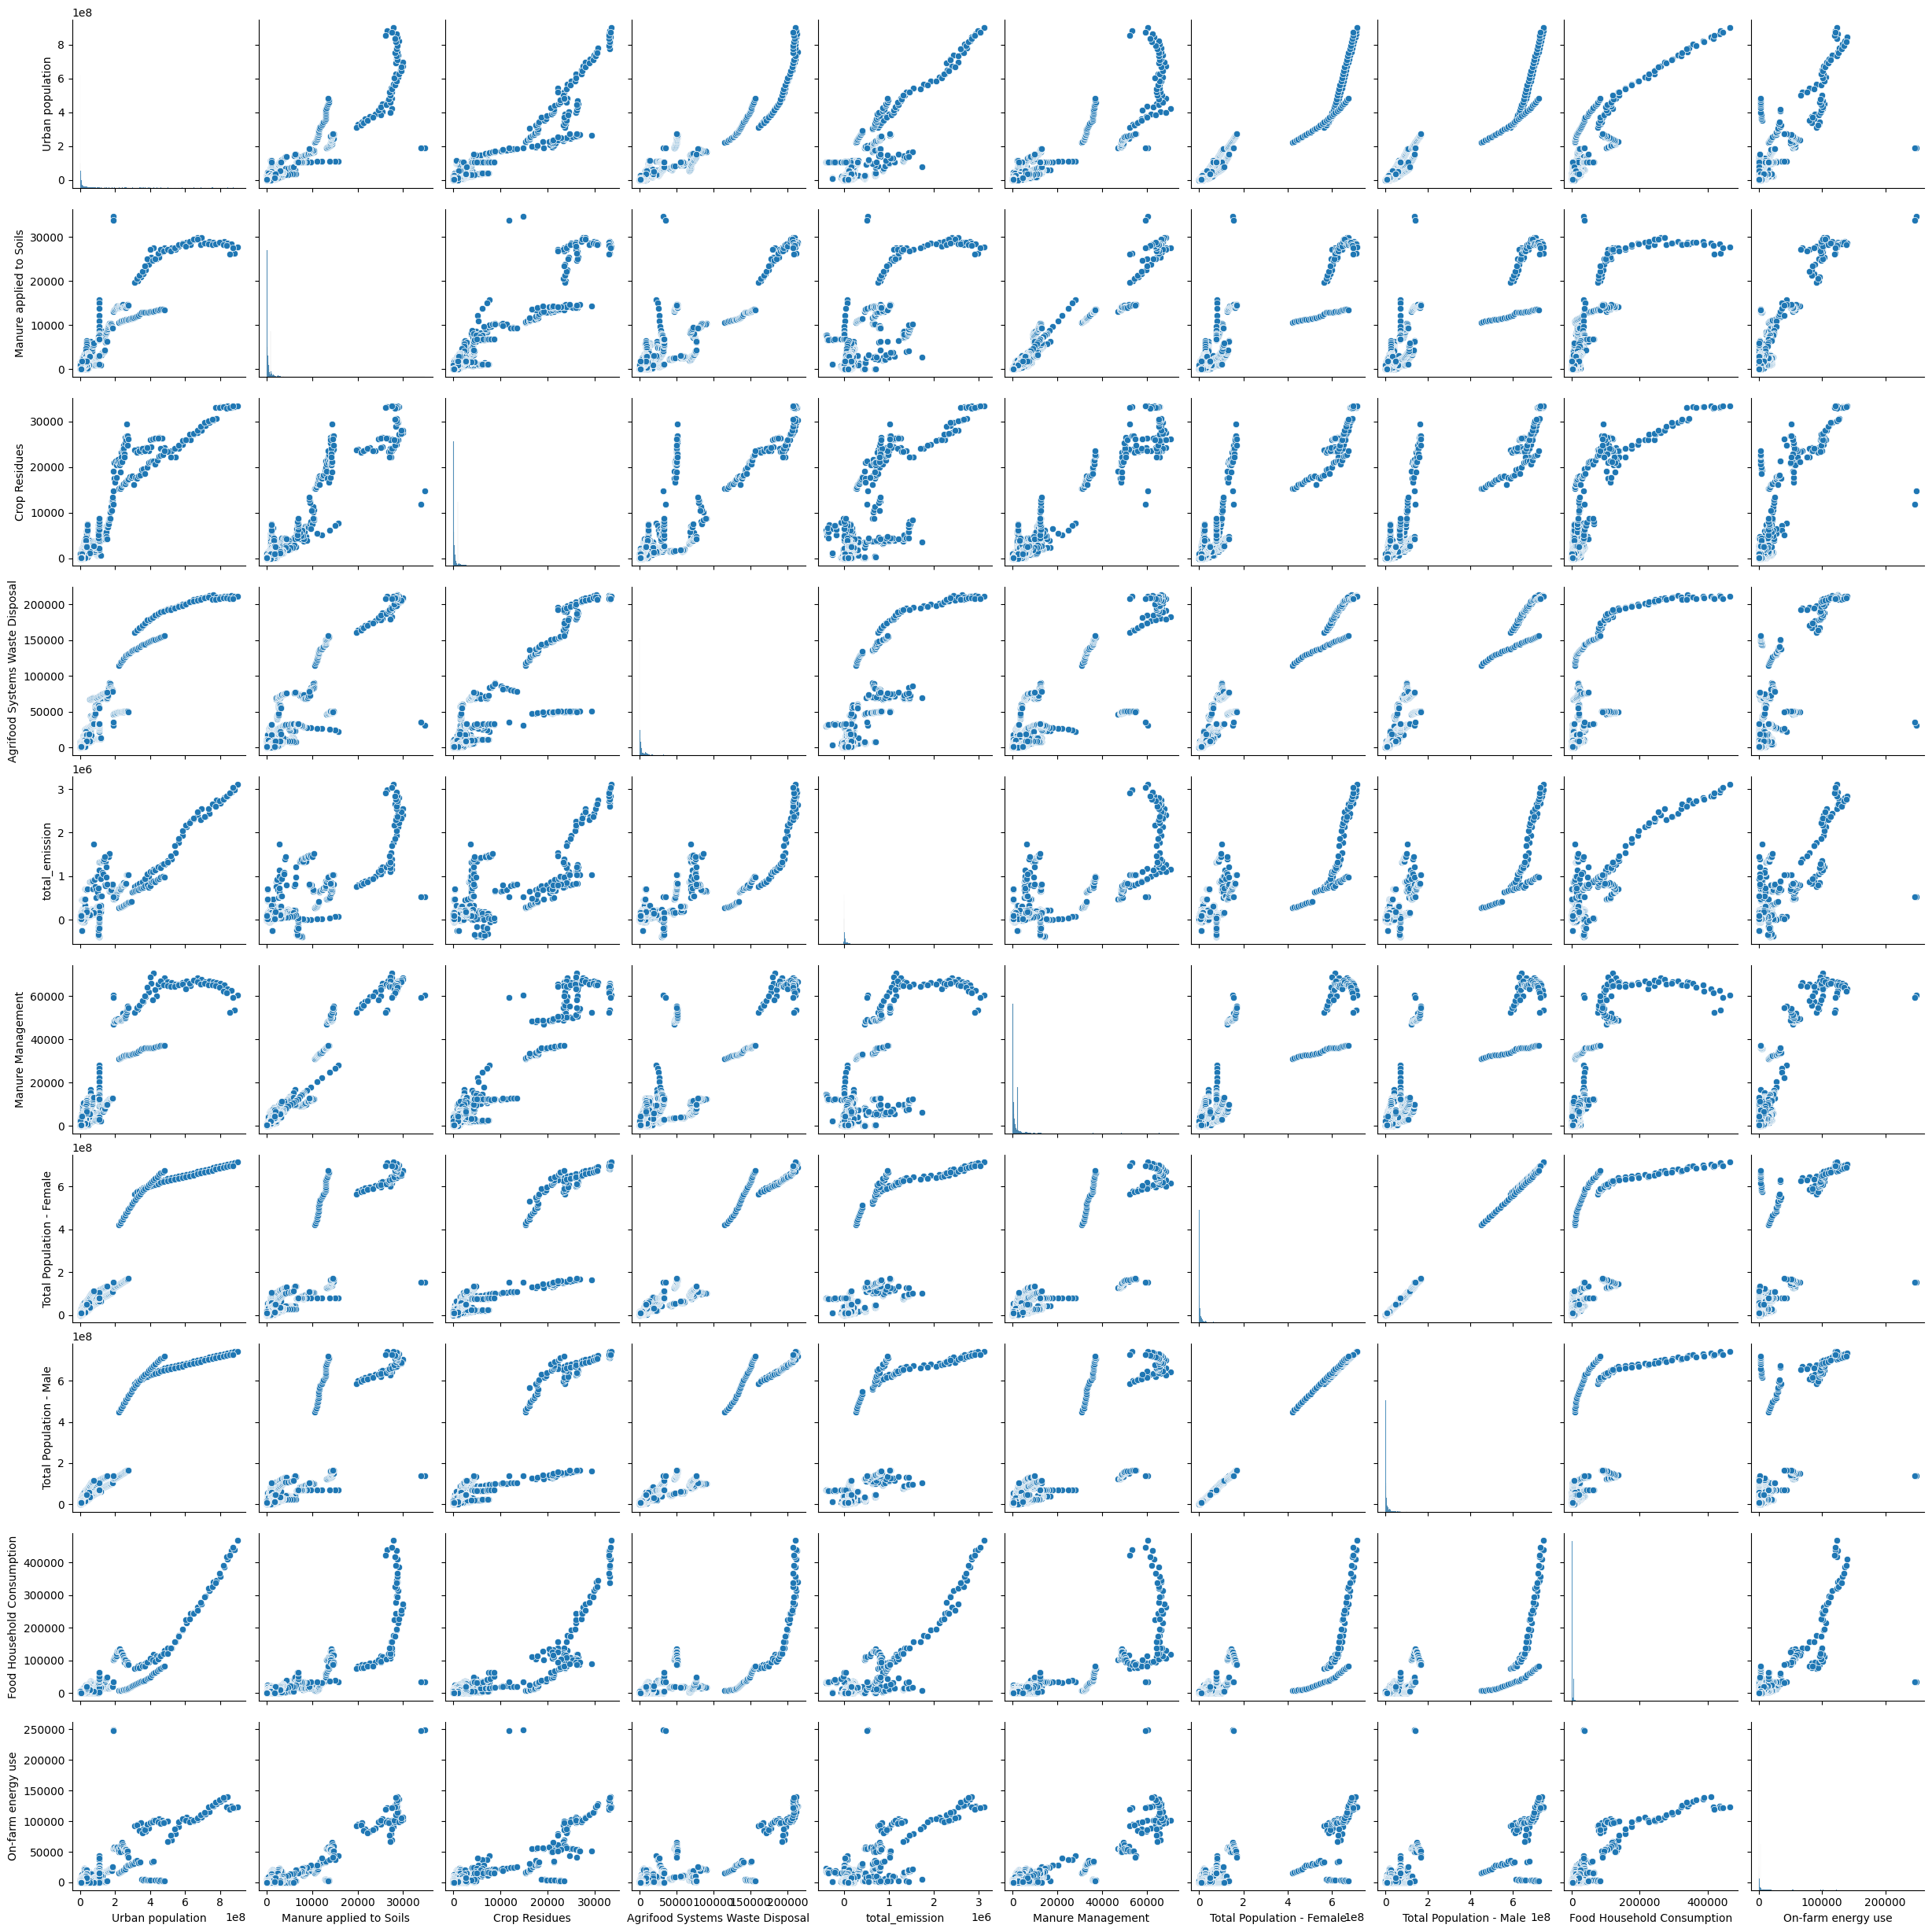

In [12]:
corr_abs = corr_matrix.abs()


np.fill_diagonal(corr_abs.values, np.nan)
mean_abs_corr = corr_abs.mean(axis=0)
top_10_features = mean_abs_corr.nlargest(10).index

df_top_10 = data[top_10_features]
sns.pairplot(df_top_10)

plt.show()

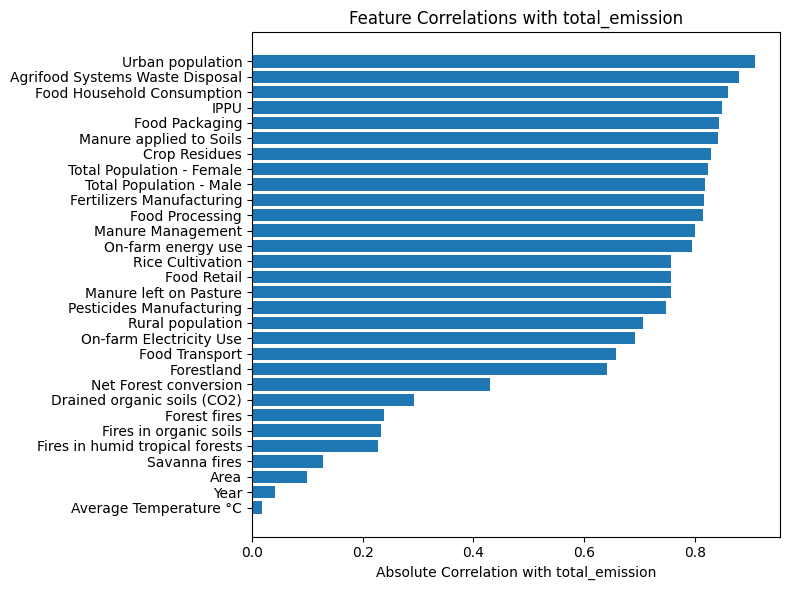

In [13]:
target = 'total_emission'

numeric_data = data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_data.corr()

features = [col for col in numeric_data.columns if col != target]
corr_vals = corr_matrix[target].loc[features].abs().sort_values()

plt.figure(figsize=(8, 6))
plt.barh(corr_vals.index, corr_vals.values)
plt.xlabel(f'Absolute Correlation with {target}')
plt.title(f'Feature Correlations with {target}')
plt.tight_layout()
plt.show()

# Preprocessing Data

In [14]:
import pandas as pd
import numpy as np

# Extract X and y from data
X = data.drop("total_emission", axis=1)
y = data["total_emission"]

# Define the percentile bounds (10th and 90th percentiles)
lower_bound = y.quantile(0.05)  # 10th percentile
upper_bound = y.quantile(0.95)  # 90th percentile

# Identify outliers (values outside the 10th to 90th percentile range)
outliers = y[(y < lower_bound) | (y > upper_bound)]
print(f"Number of outliers: {len(outliers)}")
print(f"Outlier values:\n{outliers}")

# Filter X and y to keep only data within the 10th to 90th percentile range
mask = (y >= lower_bound) & (y <= upper_bound)
y_cleaned = y[mask]
X_cleaned = X[mask]

# Verify the shapes of cleaned data
print(f"Original y shape: {y.shape}")
print(f"Cleaned y shape: {y_cleaned.shape}")
print(f"Original X shape: {X.shape}")
print(f"Cleaned X shape: {X_cleaned.shape}")

Number of outliers: 698
Outlier values:
266     197788.774700
339     210940.865200
340     209420.671700
341     208693.206600
342     208526.197700
            ...      
6783     -7818.504396
6784     -5595.490499
6785     -3168.626171
6786     -2022.531927
6787       230.589673
Name: total_emission, Length: 698, dtype: float64
Original y shape: (6965,)
Cleaned y shape: (6267,)
Original X shape: (6965, 30)
Cleaned X shape: (6267, 30)


In [15]:
X_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,6267.0,1.176549e+02,6.781537e+01,0.000000,61.000000,1.190000e+02,1.750000e+02,2.350000e+02
Year,6267.0,2.005221e+03,8.900816e+00,1990.000000,1998.000000,2.005000e+03,2.013000e+03,2.020000e+03
Savanna fires,6267.0,9.126206e+02,3.494546e+03,0.000000,0.000000,1.096500e+00,6.853040e+01,6.026631e+04
Forest fires,6267.0,6.501191e+02,2.894487e+03,0.000000,0.000000,2.605000e-01,4.746790e+01,3.108775e+04
Crop Residues,6267.0,4.988641e+02,7.218245e+02,0.000200,22.942700,1.785428e+02,9.987063e+02,8.736134e+03
Rice Cultivation,6267.0,1.959953e+03,5.449350e+03,0.000000,164.640000,4.916699e+02,1.443263e+03,5.354495e+04
Drained organic soils (CO2),6267.0,1.893586e+03,5.817017e+03,0.000000,0.000000,0.000000e+00,3.464974e+02,5.283966e+04
Pesticides Manufacturing,6267.0,1.413299e+02,4.524271e+02,0.000000,5.000000,1.223287e+01,8.700000e+01,7.619000e+03
Food Transport,6267.0,1.086001e+03,2.501616e+03,0.000100,25.805800,1.660635e+02,9.803164e+02,2.809355e+04
Forestland,6267.0,-5.599726e+03,2.367587e+04,-622211.741100,-2993.688200,-6.400200e+01,0.000000e+00,7.650030e+04


In [16]:
# Use the cleaned variables
y = y_cleaned.copy()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_cleaned, y, test_size=0.2, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to DataFrame to keep feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Print shapes to verify
print("Training set shape:", X_train_scaled.shape, y_train.shape)
print("Test set shape:", X_test_scaled.shape, y_test.shape)

Training set shape: (5013, 30) (5013,)
Test set shape: (1254, 30) (1254,)


In [23]:

dt = SKDecisionTreeRegressor(random_state=42, max_depth=7, min_samples_split=10)
dt.fit(X_train, y_train)
print(dt.predict([0] + X_train.mean()[1:]))


/root/miniconda3/envs/trns-ai/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

# Lasso From Scratch vs Lasso From Sklearn

### Lasso via Coordinate descent

In [17]:
class LassoCD:  
    """
    Lasso regression via cyclic coordinate descent.
    """

    def __init__(self, alpha=1.0, tol=1e-4, max_iter=1000):
        self.alpha = alpha
        self.tol = tol
        self.max_iter = max_iter

    @staticmethod
    def _soft_threshold(rho, alpha):
        if rho > alpha:
            return rho - alpha
        elif rho < -alpha:
            return rho + alpha
        else:
            return 0.0

    def fit(self, X, y):
        # Convert to numpy arrays
        X = np.asarray(X, dtype=float)
        y = np.asarray(y, dtype=float)

        # Store means and stds
        self.X_mean = X.mean(axis=0)
        self.X_std = X.std(axis=0, ddof=1)
        self.y_mean = y.mean()

        # Standardize X and center y
        Xs = (X - self.X_mean) / np.where(self.X_std == 0, 1.0, self.X_std)
        ys = y - self.y_mean

        n_samples, n_features = Xs.shape
        w = np.zeros(n_features)

        # Precompute column norms
        col_norms = np.sum(Xs ** 2, axis=0)

        for itr in range(self.max_iter):
            w_old = w.copy()

            for j in range(n_features):
                # Partial residual excluding feature j
                residual = ys - Xs.dot(w) + Xs[:, j] * w[j]
                rho = np.dot(Xs[:, j], residual) / n_samples
                w[j] = self._soft_threshold(rho, self.alpha) / (col_norms[j] / n_samples)

            # Check convergence
            if np.max(np.abs(w - w_old)) < self.tol:
                break

        # Store coefficients in original scale
        self.coef_     = w / np.where(self.X_std == 0, 1.0, self.X_std)
        self.intercept_ = self.y_mean - self.X_mean.dot(self.coef_)
        return self

    def predict(self, X):
        X = np.asarray(X, dtype=float)
        return X.dot(self.coef_) + self.intercept_


### Lasso via (Vanilla) Gradient Descent

In [18]:
class LassoGD:
    def __init__(self, alpha=1.0, lr=0.01, max_iter=1000, tol=1e-4):
        self.alpha = alpha
        self.lr = lr
        self.max_iter = max_iter
        self.tol = tol

    def fit(self, X, y):
        X = np.asarray(X, dtype=float)
        y = np.asarray(y, dtype=float).ravel()
        n_samples, n_features = X.shape

        # Standardize X and center y
        self.X_mean = X.mean(axis=0)
        self.X_std = X.std(axis=0, ddof=1)
        self.y_mean = y.mean()

        Xs = (X - self.X_mean) / self.X_std
        ys = y - self.y_mean

        w = np.zeros(n_features)

        for _ in range(self.max_iter):
            y_pred = Xs @ w
            error = y_pred - ys

            grad = (Xs.T @ error) / n_samples  # gradient of MSE part

            # Subgradient for L1: sign(w)
            subgrad = self.alpha * np.sign(w)

            # Full gradient with subgradient
            update = grad + subgrad

            w_new = w - self.lr * update

            # Convergence check
            if np.max(np.abs(w_new - w)) < self.tol:
                break

            w = w_new

        self.coef_ = w / self.X_std
        self.intercept_ = self.y_mean - np.dot(self.X_mean, self.coef_)

        return self

### Lasso via Proximal Gradient Descent

In [19]:

class LassoPGD:
    """
    Lasso regression using Proximal Gradient Descent (PGD).
    """
    def __init__(self, alpha=1.0, lr=0.01, max_iter=1000, tol=1e-4):
        self.alpha = alpha
        self.lr = lr
        self.max_iter = max_iter
        self.tol = tol

    def _soft_threshold(self, x, thresh):
        """
        Soft-thresholding operator for proximal step.
        """
        return np.sign(x) * np.maximum(np.abs(x) - thresh, 0.0)

    def fit(self, X, y):
        # Convert inputs to arrays
        X = np.asarray(X, dtype=float)
        y = np.asarray(y, dtype=float).ravel()
        n_samples, n_features = X.shape

        # Standardize X and center y
        self.X_mean = X.mean(axis=0)
        self.X_std = X.std(axis=0, ddof=1)
        self.y_mean = y.mean()
        Xs = (X - self.X_mean) / self.X_std
        ys = y - self.y_mean

        # Initialize weights
        w = np.zeros(n_features)

        for iteration in range(self.max_iter):
            # Gradient of the smooth (MSE) part
            y_pred = Xs @ w
            error = y_pred - ys
            grad = (Xs.T @ error) / n_samples

            # Gradient descent step
            w_temp = w - self.lr * grad

            # Proximal (soft-thresholding) step
            w_new = self._soft_threshold(w_temp, self.lr * self.alpha)

            # Check convergence
            if np.max(np.abs(w_new - w)) < self.tol:
                w = w_new
                break

            w = w_new

        # Rescale coefficients to original feature scale
        self.coef_ = w / self.X_std
        self.intercept_ = self.y_mean - np.dot(self.X_mean, self.coef_)
        return self

    def predict(self, X):
        X = np.asarray(X, dtype=float)
        return X.dot(self.coef_) + self.intercept_


### Comparision
Vanilla Gradient Descent can not shrink any coffients to exactly 0 due to the subgradient of the l1 term. Alternatively, we can use Proximal-Gradient or Coordinate Descent

In [20]:

def run_lasso_scratch_cd(X_train, y_train, alpha, tol, max_iter):
    lasso_cd = LassoCD(alpha=alpha, tol=tol, max_iter=max_iter)
    lasso_cd.fit(X_train, y_train)
    return lasso_cd.coef_, lasso_cd.intercept_

def run_lasso_scratch_gd(X_train, y_train, alpha, lr, max_iter, tol):
    lasso_gd = LassoGD(alpha, lr, max_iter, tol)
    lasso_gd.fit(X_train, y_train)
    return lasso_gd.coef_, lasso_gd.intercept_

def run_lasso_scratch_pgd(X_train, y_train, alpha, lr, max_iter, tol):
    lasso_gd = LassoPGD(alpha, lr, max_iter, tol)
    lasso_gd.fit(X_train, y_train)
    return lasso_gd.coef_, lasso_gd.intercept_
def run_lasso_sklearn(X_train, y_train, alpha, tol, max_iter):

    lasso = Lasso(alpha, tol=tol, max_iter=max_iter)
    lasso.fit(X_train, y_train)
    return lasso.coef_, lasso.intercept_
def compare_models(X_train, y_train, X_test, y_test, alpha, tol, max_iter, lr):
    methods = {
        'Lasso_sklearn'    : run_lasso_sklearn,
        'Lasso_scratch_CD' : run_lasso_scratch_cd,
        'Lasso_scratch_PGD': run_lasso_scratch_pgd,
        'Lasso_scratch_GD' : run_lasso_scratch_gd,
    }

    coef_data    = {}
    metrics_data = {}

    for name, func in methods.items():
        # fit & get coef/intercept
        if name in ('Lasso_scratch_GD','Lasso_scratch_PGD'):
            coef, intercept = func(X_train, y_train, alpha, lr, max_iter, tol)
        else:
            coef, intercept = func(X_train, y_train, alpha, tol, max_iter)

        # flatten in case they come back 2D
        coef      = np.ravel(coef)
        intercept = float(intercept.item())

        # store
        coef_data[name] = np.hstack(([intercept], coef))

        # predictions
        y_train_pred = X_train.values.dot(coef) + intercept
        y_test_pred  = X_test .values.dot(coef) + intercept

        metrics_data[name] = {
            'train_r2': r2_score(y_train, y_train_pred),
            'test_r2' : r2_score(y_test,  y_test_pred),
            'train_rmse': root_mean_squared_error(y_train, y_train_pred),
            'test_rmse' : root_mean_squared_error(y_test,  y_test_pred),
            'train_mae': mean_absolute_error(y_train, y_train_pred),
            'test_mae' : mean_absolute_error(y_test,  y_test_pred)
        }

    # Build index: intercept + actual feature names
    feature_names = ['intercept'] + list(X_train.columns)
    coef_df = pd.DataFrame(coef_data, index=feature_names)

    metrics_df = pd.DataFrame(metrics_data).T

    return coef_df, metrics_df


In [21]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

param_grid = {
    'alpha': np.logspace(-4, 1, 50)  # from 1e-4 to 10, 50 values
}

lasso = Lasso(max_iter=10000, fit_intercept=True)

gs = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid,
    scoring='r2',      # maximize R²
    cv=5,
    n_jobs=-1,
    verbose=1
)

gs.fit(X_train, y_train)

print("Best α:", gs.best_params_['alpha'])
print("Best CV R²:", gs.best_score_)

best_lasso = gs.best_estimator_
y_test_pred = best_lasso.predict(X_test_scaled)

print("Test R²:", r2_score(y_test, y_test_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/root/miniconda3/envs/trns-ai/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.964e+10, tolerance: 6.200e+08
  model = cd_fast.enet_coordinate_descent(
/root/miniconda3/envs/trns-ai/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.918e+10, tolerance: 6.231e+08
  model = cd_fast.enet_coordinate_descent(
/root/miniconda3/envs/trns-ai/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

Best α: 0.0001
Best CV R²: 0.9818238949605173
Test R²: -2.6253803154602644
Test RMSE: 76542.96137982898
Test MAE: 65156.50406313031


/root/miniconda3/envs/trns-ai/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.115e+10, tolerance: 7.650e+08
  model = cd_fast.enet_coordinate_descent(


In [22]:
# Model parameters
alpha = 20 # Not the best param, because our target is strongly correlated with all features, if alpha is small, no coeficient is shinked to 0, lasso can not select features
tol = 1e-6
max_iter = 10000
lr = 0.05

# Compare models using our function
coef_comparison, metrics_comparison = compare_models(
    X_train, y_train,
    X_test, y_test,
    alpha=alpha, tol=tol,
    max_iter=max_iter, lr=lr
)


/root/miniconda3/envs/trns-ai/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.115e+10, tolerance: 7.650e+06
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Display results
ace_tools.display_dataframe_to_user("Model Metrics", metrics_comparison)
ace_tools.display_dataframe_to_user("Model Coefficents", coef_comparison)

Model Metrics


Model Coefficents


In [69]:

# Node structure
Node = namedtuple("Node", ["feature_index", "threshold", "left", "right", "value"])
from collections import namedtuple
import numpy as np

# Node structure
Node = namedtuple("Node", ["feature_index", "threshold", "left", "right", "value"])

class ScratchDecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=2, min_impurity_decrease=1e-7):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_impurity_decrease = min_impurity_decrease
        self.root = None

    def fit(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y)
        self.n_features_ = X.shape[1]
        self.root = self._build_tree(X, y, depth=0)
        return self

    def _mse(self, y):
        if len(y) == 0:
            return 0
        return np.mean((y - y.mean()) ** 2)

    def _best_split(self, X, y):
        best_mse = float('inf')
        best_idx, best_thr = None, None
        parent_mse = self._mse(y)

        for idx in range(self.n_features_):
            sorted_idx = np.argsort(X[:, idx])
            X_sorted = X[sorted_idx, idx]
            y_sorted = y[sorted_idx]

            # Generate midpoints between consecutive unique values
            for i in range(1, len(X_sorted)):
                if X_sorted[i] == X_sorted[i - 1]:
                    continue
                thr = (X_sorted[i] + X_sorted[i - 1]) / 2

                left_mask = X[:, idx] <= thr
                right_mask = ~left_mask

                if left_mask.sum() < self.min_samples_split or right_mask.sum() < self.min_samples_split:
                    continue

                mse_left = self._mse(y[left_mask])
                mse_right = self._mse(y[right_mask])
                mse_total = (left_mask.sum() * mse_left + right_mask.sum() * mse_right) / len(y)

                impurity_decrease = parent_mse - mse_total
                if impurity_decrease >= self.min_impurity_decrease and mse_total < best_mse:
                    best_mse, best_idx, best_thr = mse_total, idx, thr

        return best_idx, best_thr

    def _build_tree(self, X, y, depth):
        if len(y) < self.min_samples_split or (self.max_depth is not None and depth >= self.max_depth):
            return Node(None, None, None, None, y.mean())

        idx, thr = self._best_split(X, y)
        if idx is None:
            return Node(None, None, None, None, y.mean())

        left_mask = X[:, idx] <= thr
        right_mask = ~left_mask

        left = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right = self._build_tree(X[right_mask], y[right_mask], depth + 1)
        return Node(idx, thr, left, right, None)

    def _predict_one(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature_index] <= node.threshold:
            return self._predict_one(x, node.left)
        else:
            return self._predict_one(x, node.right)

    def predict(self, X):
        X = np.asarray(X)
        return np.array([self._predict_one(x, self.root) for x in X])



In [70]:
from sklearn.tree import DecisionTreeRegressor as SKDecisionTreeRegressor

def run_tree_scratch(X_train, y_train, max_depth=None, min_samples_split=2):
    scratch_tree = ScratchDecisionTreeRegressor(
        max_depth=max_depth,
        min_samples_split=min_samples_split
    )
    scratch_tree.fit(X_train, y_train)
    return scratch_tree


def run_tree_sklearn(X_train, y_train, max_depth=None, min_samples_split=2, random_state=None):
    sk_tree = SKDecisionTreeRegressor(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=random_state
    )
    sk_tree.fit(X_train, y_train)
    return sk_tree


In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {
    'max_depth':        [3,4,5,6,7],
    'min_samples_split':[10, 15, 20, 25, 30],
}

dt = DecisionTreeRegressor(random_state=42)
gs = GridSearchCV(
    dt, 
    param_grid, 
    cv=5, 
    scoring='r2',
    n_jobs=-1
)
gs.fit(X_train, y_train)

print("Best params:", gs.best_params_)
print("Best CV R2:", gs.best_score_)


Best params: {'max_depth': 7, 'min_samples_split': 10}
Best CV R2: 0.9255784264417086


In [72]:
Node = namedtuple("Node", ["feature_index", "threshold", "left", "right", "value", "n_samples", "impurity"])

class ScratchDecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=2, min_impurity_decrease=1e-7):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_impurity_decrease = min_impurity_decrease
        self.root = None
        self.n_features_ = None
        self._feature_importances = None  # To store raw importance scores
        self.total_samples_ = None  # To store total number of samples

    def fit(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y)
        self.n_features_ = X.shape[1]
        self.total_samples_ = len(y)
        self._feature_importances = np.zeros(self.n_features_)  # Initialize importance array
        self.root = self._build_tree(X, y, depth=0)
        return self

    def _mse(self, y):
        if len(y) == 0:
            return 0
        return np.mean((y - y.mean()) ** 2)

    def _best_split(self, X, y):
        best_mse = float('inf')
        best_idx, best_thr = None, None
        parent_mse = self._mse(y)

        for idx in range(self.n_features_):
            sorted_idx = np.argsort(X[:, idx])
            X_sorted = X[sorted_idx, idx]
            y_sorted = y[sorted_idx]

            for i in range(1, len(X_sorted)):
                if X_sorted[i] == X_sorted[i - 1]:
                    continue
                thr = (X_sorted[i] + X_sorted[i - 1]) / 2

                left_mask = X[:, idx] <= thr
                right_mask = ~left_mask

                if left_mask.sum() < self.min_samples_split or right_mask.sum() < self.min_samples_split:
                    continue

                mse_left = self._mse(y[left_mask])
                mse_right = self._mse(y[right_mask])
                mse_total = (left_mask.sum() * mse_left + right_mask.sum() * mse_right) / len(y)

                impurity_decrease = parent_mse - mse_total
                if impurity_decrease >= self.min_impurity_decrease and mse_total < best_mse:
                    best_mse, best_idx, best_thr = mse_total, idx, thr

        return best_idx, best_thr

    def _build_tree(self, X, y, depth):
        n_samples = len(y)
        impurity = self._mse(y)

        if n_samples < self.min_samples_split or (self.max_depth is not None and depth >= self.max_depth):
            return Node(None, None, None, None, y.mean(), n_samples, impurity)

        idx, thr = self._best_split(X, y)
        if idx is None:
            return Node(None, None, None, None, y.mean(), n_samples, impurity)

        left_mask = X[:, idx] <= thr
        right_mask = ~left_mask

        # Compute impurity reduction for this split
        mse_parent = self._mse(y)
        mse_left = self._mse(y[left_mask])
        mse_right = self._mse(y[right_mask])
        mse_total = (left_mask.sum() * mse_left + right_mask.sum() * mse_right) / n_samples
        impurity_reduction = mse_parent - mse_total

        # Update feature importance
        self._feature_importances[idx] += impurity_reduction * n_samples

        left = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right = self._build_tree(X[right_mask], y[right_mask], depth + 1)
        return Node(idx, thr, left, right, None, n_samples, impurity)

    def _predict_one(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature_index] <= node.threshold:
            return self._predict_one(x, node.left)
        else:
            return self._predict_one(x, node.right)

    def predict(self, X):
        X = np.asarray(X)
        return np.array([self._predict_one(x, self.root) for x in X])

    @property
    def feature_importances_(self):
        """Compute normalized feature importances (sum to 1)."""
        if self._feature_importances is None:
            raise ValueError("Fit the model before accessing feature importances.")
        # Normalize by total importance and total samples
        total_importance = self._feature_importances.sum()
        if total_importance == 0:
            return np.zeros(self.n_features_)
        return self._feature_importances / total_importance
from sklearn.inspection import permutation_importance

import pandas as pd
import numpy as np

def compare_feature_importance(models, feature_names):
    importances = {}
    for name, model in models.items():
        try:
            # Access feature importances
            importances[name] = model.feature_importances_
        except AttributeError:
            raise ValueError(f"Model {name} does not have a feature_importances_ attribute.")
    
    # Create DataFrame with feature names as index
    df = pd.DataFrame(importances, index=feature_names)
    df.index.name = 'Features'
    return df



def compare_trees(X_train, y_train, X_test, y_test,
                  max_depth=None, min_samples_split=2, random_state=42):
    methods = {
        'Tree_scratch': ScratchDecisionTreeRegressor,
        'Tree_sklearn': SKDecisionTreeRegressor
    }
    metrics = []
    models = {}

    for name, func in methods.items():
        if name == 'Tree_sklearn':
            model = func(max_depth=max_depth, min_samples_split=min_samples_split, random_state=random_state)
        else:
            model = func(max_depth=max_depth, min_samples_split=min_samples_split)
    
        model.fit(X_train, y_train)
        models[name] = model
        
        # Collect metrics
        for split, X, y in [('train', X_train, y_train), ('test', X_test, y_test)]:
            y_pred = model.predict(X)
            metrics.append({
                'model': name,
                'split': split,
                'r2': r2_score(y, y_pred),
                'rmse': root_mean_squared_error(y, y_pred),
                'mae': mean_absolute_error(y, y_pred)
            })

    # Create initial DataFrame
    metrics_df = pd.DataFrame(metrics)

    # Pivot to align with Lasso format (single-level columns)
    metrics_df = metrics_df.pivot(index='model', columns='split', values=['r2', 'rmse', 'mae'])

    # Flatten the MultiIndex columns
    metrics_df.columns = [f"{split}_{metric}" for metric in ['r2', 'rmse', 'mae'] for split in ['train', 'test']]
    metrics_df = metrics_df.reset_index().set_index('model')

    return metrics_df, models

In [73]:
tree_metrics, models = compare_trees(X_train, y_train, X_test, y_test, max_depth=7, min_samples_split=10, random_state=42)
importance_df = compare_feature_importance(models, X_train_scaled.columns)
ace_tools.display_dataframe_to_user("Decision tree metrics", tree_metrics)
ace_tools.display_dataframe_to_user("Feature Importance", importance_df)

Decision tree metrics


Feature Importance


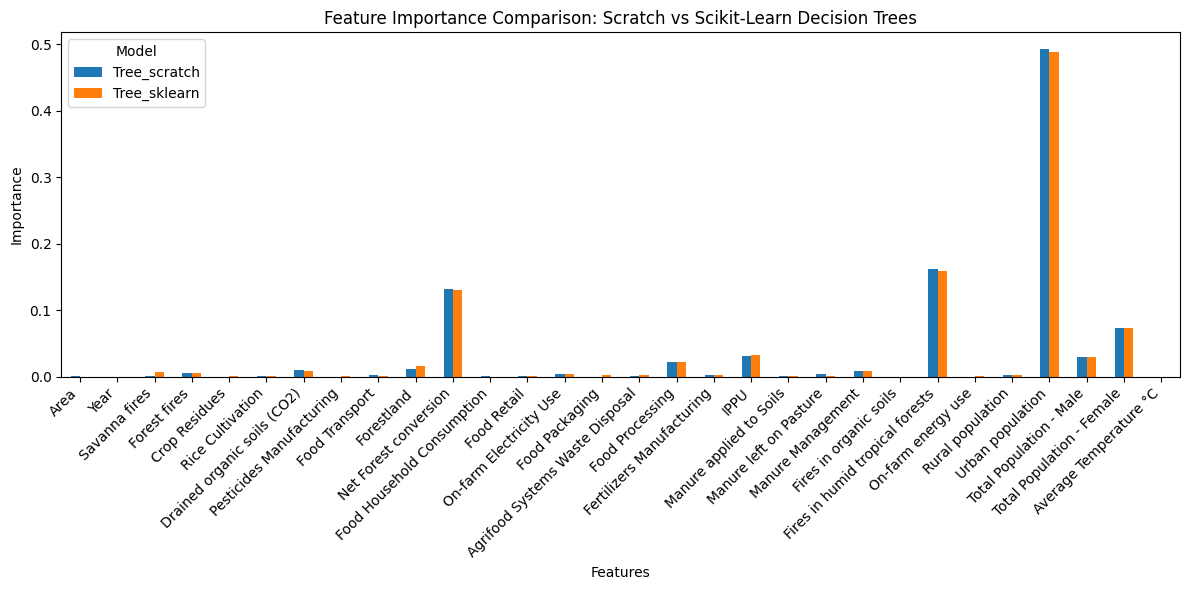

In [74]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming importance_df is available from compare_feature_importance
# Plot feature importance
importance_df.plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importance Comparison: Scratch vs Scikit-Learn Decision Trees')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Model')
plt.tight_layout()
plt.savefig('feature_importance_comparison.png')
plt.show()

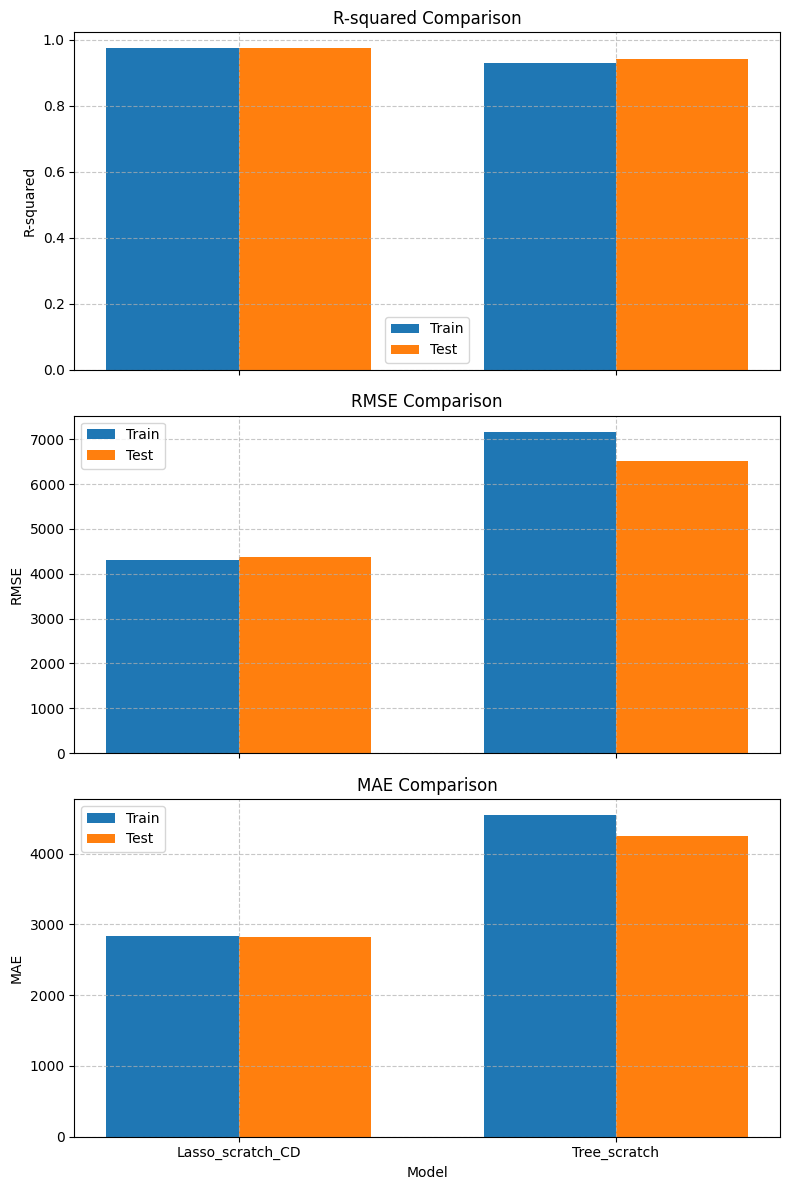

In [75]:
# Filter to include only Lasso_scratch_CD and Tree_scratch
metrics_df_lasso_filtered = metrics_comparison.loc[['Lasso_scratch_CD']]
metrics_df_trees_filtered = tree_metrics.loc[['Tree_scratch']]

# Combine the filtered DataFrames
combined_metrics = pd.concat([metrics_df_lasso_filtered, metrics_df_trees_filtered])

# Melt the DataFrame for plotting
metrics_melted = combined_metrics.reset_index().melt(
    id_vars=['index'],
    value_vars=['train_r2', 'test_r2', 'train_rmse', 'test_rmse', 'train_mae', 'test_mae'],
    var_name='Metric_Split',
    value_name='Score'
)

# Split Metric_Split into Metric and Split columns
metrics_melted[['Split', 'Metric']] = metrics_melted['Metric_Split'].str.split('_', expand=True)
metrics_melted = metrics_melted.pivot(
    index=['index', 'Split'],
    columns='Metric',
    values='Score'
).reset_index()

# Create figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

# Bar width and positions
bar_width = 0.35
index = np.arange(len(metrics_melted['index'].unique()))

# Subplot 1: R-squared
ax1.bar(index, metrics_melted[metrics_melted['Split'] == 'train']['r2'], bar_width, label='Train')
ax1.bar(index + bar_width, metrics_melted[metrics_melted['Split'] == 'test']['r2'], bar_width, label='Test')
ax1.set_title('R-squared Comparison')
ax1.set_ylabel('R-squared')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# Subplot 2: RMSE
ax2.bar(index, metrics_melted[metrics_melted['Split'] == 'train']['rmse'], bar_width, label='Train')
ax2.bar(index + bar_width, metrics_melted[metrics_melted['Split'] == 'test']['rmse'], bar_width, label='Test')
ax2.set_title('RMSE Comparison')
ax2.set_ylabel('RMSE')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)

# Subplot 3: MAE
ax3.bar(index, metrics_melted[metrics_melted['Split'] == 'train']['mae'], bar_width, label='Train')
ax3.bar(index + bar_width, metrics_melted[metrics_melted['Split'] == 'test']['mae'], bar_width, label='Test')
ax3.set_title('MAE Comparison')
ax3.set_ylabel('MAE')
ax3.legend()
ax3.grid(True, linestyle='--', alpha=0.7)

# Set x-axis labels
ax3.set_xlabel('Model')
ax3.set_xticks(index + bar_width / 2)
ax3.set_xticklabels([f"{model}" for model in metrics_melted['index'].unique()], rotation=0, ha='center')

plt.tight_layout()
plt.savefig('performance_comparison_subplots.png')
plt.show()